# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 3.5: Propriedades da DCT

In [3]:
import math as m
import numpy as np
import scipy.fftpack as spfft
import matplotlib.pyplot as plt
from ipywidgets import FloatLogSlider,Label,Layout, interactive, VBox, AppLayout

### Seção 3.5.1: Formas básicas de onda para a DCT

Denote por $\mathcal{C}_{N,j}$ a $j$-ésima linha da matriz $\mathcal{C}_N$, de tal forma que
$$\mathcal{C}_N
= \begin{pmatrix}
	\quad\mathcal{C}_{N,0}^T\quad\\\hline \mathcal{C}_{N,1}^T \\\hline \vdots \\\hline \mathcal{C}_{N,N-1}^T
\end{pmatrix}
\ \text{e}\ 
\mathcal{C}_N^T = \left(\begin{array}{c|c|c|c}
\rule{0mm}{0mm}\\
	\mathcal{C}_{N,0} & \mathcal{C}_{N,1} & \cdots & \mathcal{C}_{N,N-1}\\
\rule{0mm}{0mm}
\end{array}\right)
$$

Então

\begin{equation*}
	I = \mathcal{C}_N\mathcal{C}_N^{-1} = \mathcal{C}_N\mathcal{C}_N^T = \begin{pmatrix}
		\ddots & \vdots & \\
		\dots & \mathcal{C}_{N,i}^T\mathcal{C}_{N,j} & \dots \\
		& \vdots & \ddots
	\end{pmatrix}
\end{equation*}

Logo

\begin{equation*}
	(\mathcal{C}_{N,i}, \mathcal{C}_{N,j}) = \mathcal{C}_{N,i}^T\mathcal{C}_{N,j} = \left\{\begin{array}{ll}
		1 & \text{ se }i = j \\
		0 & \text{ se }i \neq j
	\end{array}\right.
\end{equation*}

Ou seja, os vetores $\mathcal{C}_{N,i}$:

- possuem norma unitária, e
- são ortogonais dois a dois (e portanto linearmente independentes).

Destas propriedades segue que a coleção de vetores $\{\mathcal{C}_{N,k}\}_{k=0, 1, \dots, N-1}$ onde 

\begin{equation*}
	\mathcal{C}_{N,0} = \begin{pmatrix}
			\sqrt{\frac{1}{N}} \\ \sqrt{\frac{1}{N}} \\ \vdots \\ \sqrt{\frac{1}{N}}
		\end{pmatrix}
        \ \text{e}\ 
	\mathcal{C}_{N,k} = \sqrt{\frac{2}{N}}\begin{pmatrix}
			\cos\left(\frac{\pi k\left(0 + \frac{1}{2}\right)}{N}\right) \\
			\cos\left(\frac{\pi k\left(1 + \frac{1}{2}\right)}{N}\right) \\
			\vdots \\
			\cos\left(\frac{\pi k\left(N-1 + \frac{1}{2}\right)}{N}\right)
		\end{pmatrix},\ k \neq 0
\end{equation*}

é uma base **ortonormal** tanto para $\mathbb{C}^N$ quanto para $\mathbb{R}^N$.

É importante lembrar que uma base ortonormal $\{\mathcal{C}_{N,k}\}_{k=0, 1, \dots, N-1}$ de $\mathbb{C}^N$ permite a representação de um $x\in\mathbb{C}^N$ qualquer como

\begin{equation*}
	x = \sum\limits_{k=0}^{N-1}\alpha_k \mathcal{C}_{N,k}
\end{equation*}

onde

$$\alpha_k = (x, \mathcal{C}_{N,k}).$$

Logo,

$$\alpha_k = (x, \mathcal{C}_{N,k}) = \left\{\begin{array}{ll}
	\sum\limits_{m=0}^{N-1} x_m \sqrt{\frac{1}{N}} & \text{ se } k = 0 \\
	\sum\limits_{m=0}^{N-1} x_m \sqrt{\frac{2}{N}}\cos\left(\frac{\pi k\left(m + \frac{1}{2}\right)}{N}\right) & \text{ se } k \neq 0,
\end{array}\right.$$

ou seja, $\alpha_k=C_k$ onde $C=DCT(x)$.

Também segue do fato de $\{\mathcal{C}_{N,k}\}_{k=0, 1, \dots, N-1}$ ser uma base de $\mathbb{C}^N$, a observação que a DCT, assim como a DFT, também pode ser aplicada a sinais $x\in\mathbb{C}^N$ complexos (produzindo $C\in\mathbb{C}^N$). 

Por outro lado, diferentemente da DFT,

$$x\in\mathbb{R}^N\iff C = DCT(x)\in\mathbb{R}^N.$$

### Seção 3.5.2: Domínio da frequência para a DCT

As funções básicas $(\mathcal{C}_{k})_n=\sqrt{\frac{"1\ \text{ou}\ 2"}{N}}\cos\left(\frac{2\pi\frac{k}{2}(n+\frac{1}{2})}{N}\right)$ são:

In [4]:
def plota_base_DCT(N):
    t = np.arange(0.5,N,1); plt.figure(figsize=(15,5))
    plt.title(r'Funções básicas da DCT $\mathcal{C}_{256,k}$ $0\leq k < 9$')
    plt.xlabel('tempo (amostras)'); plt.ylabel('amplitude')
    plt.axhline(y=0.0, color='gray', linestyle='--', ms=1)
    for k in range(10):
        plt.plot(t, m.sqrt((1+(k>0))/N)*np.cos(m.pi*k*t/N), label=r"$\mathcal{C}_{%d}$" % k)
    plt.title("Figura 3.8: Funções básicas usadas na DCT")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

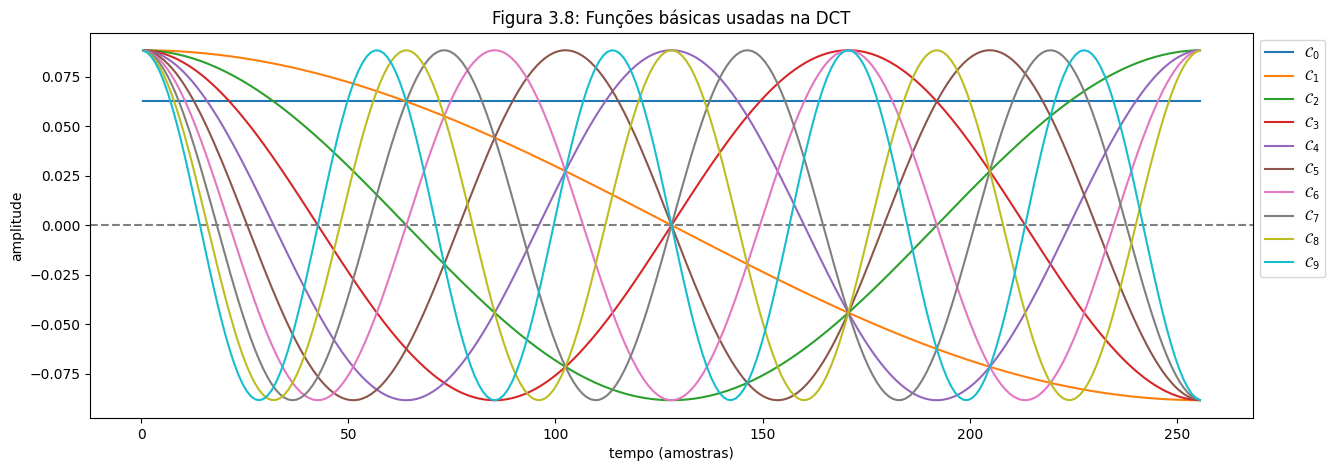

In [5]:
plota_base_DCT(256)

## Seção 3.5.3 -  Repetição dos exemplos de compressão usando DCT ao invés de DFT

### Exemplo 1: Função $f(t) = (t-t^2)^2$

In [6]:
# função auxiliar
def plot_func_dct(t,f):
    N = len(t)
    F = spfft.dct(f, norm='ortho')

    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].set_title('Sinal f(t)')
    ax[0].plot(t,f)
    ax[0].set_xlabel('tempo (s)')
    ax[0].set_ylabel('amplitude')
    ax[1].set_title('Espectro DCT')
    ax[1].plot(np.arange(N),F/N)
    ax[1].set_xlabel('bins')
    ax[1].set_ylabel('amplitude')
    plt.show()

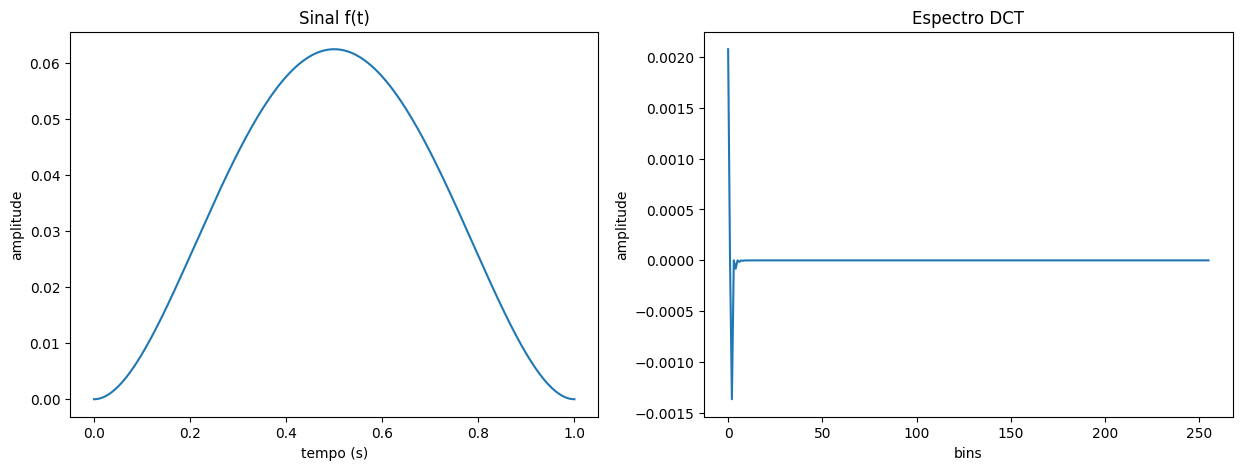

In [7]:
t = np.linspace(0, 1, 256)
f = (t - t**2) **2
X = plot_func_dct(t,f)

In [8]:
# funções auxiliares
def thresholding(f, c, method='fft'):
    trans = (lambda x: spfft.dct(x, norm='ortho', type=2)) if method=='dct' else np.fft.fft
    itrans = (lambda x: spfft.idct(x,norm='ortho',type=2)) if method=='dct' else np.fft.ifft
    F = trans(f)
    M = max(abs(F))
    F_tilde = np.array([F_k if abs(F_k) > c*M else 0.0 for F_k in F])
    f_tilde = np.real(itrans(F_tilde))
    return f_tilde, F_tilde

def compression(X_tilde):
    return np.count_nonzero(X_tilde)/len(X_tilde)

def distortion(f, f_tilde):
    return np.linalg.norm(f-f_tilde)**2 / np.linalg.norm(f)**2

def comp_dist_list(f,C, method='fft'):
    P = []
    D = []
    for c in C:
        f_tilde, F_tilde = thresholding(f, c, method=method)
        P += [compression(F_tilde)]
        D += [distortion(f, f_tilde)]
    return P, D

def plot_threshold(f, c_min=0.05, c_max=0.5):
    C = np.arange(c_min,c_max, 1/(100*c_max))
    P, D = comp_dist_list(f,C,method='fft')
    PC, DC = comp_dist_list(f,C,method='dct')
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(C, P, label='FFT')
    ax[0].plot(C, PC, label='DCT')
    ax[0].set_title("Compressão do sinal com FFT e DCT")
    ax[0].set_xlabel("c")
    ax[0].set_ylabel("Compressão")
    ax[1].plot(C, D, label='FFT')
    ax[1].plot(C, DC, label='DCT')
    ax[1].set_title("Distorção do sinal com FFT e DCT")
    ax[1].set_xlabel("c")
    ax[1].set_ylabel("Distorção")
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

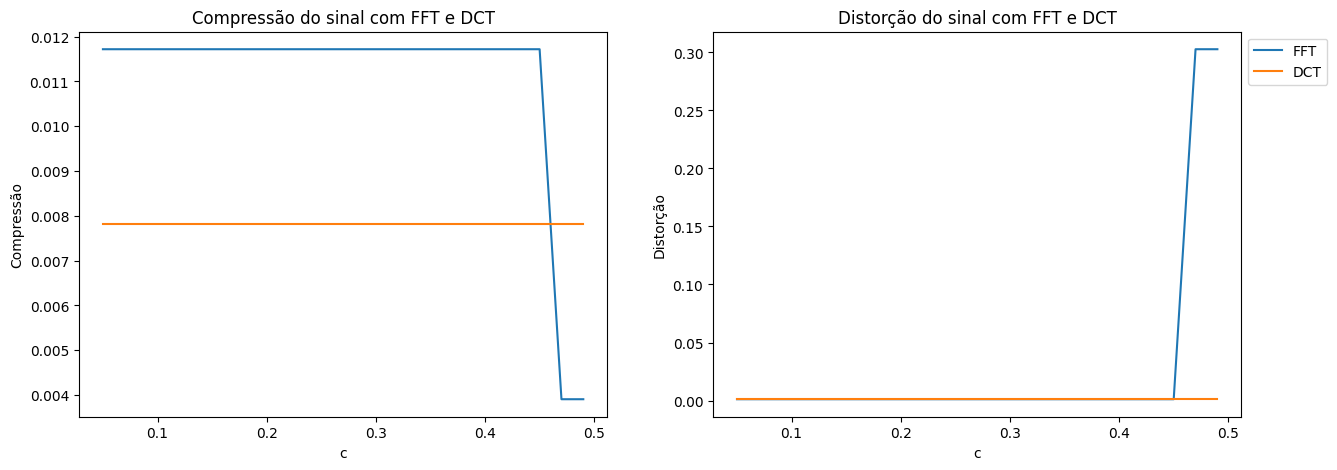

In [9]:
plot_threshold(f, c_max=0.5)

## Exemplo 2: Função degrau

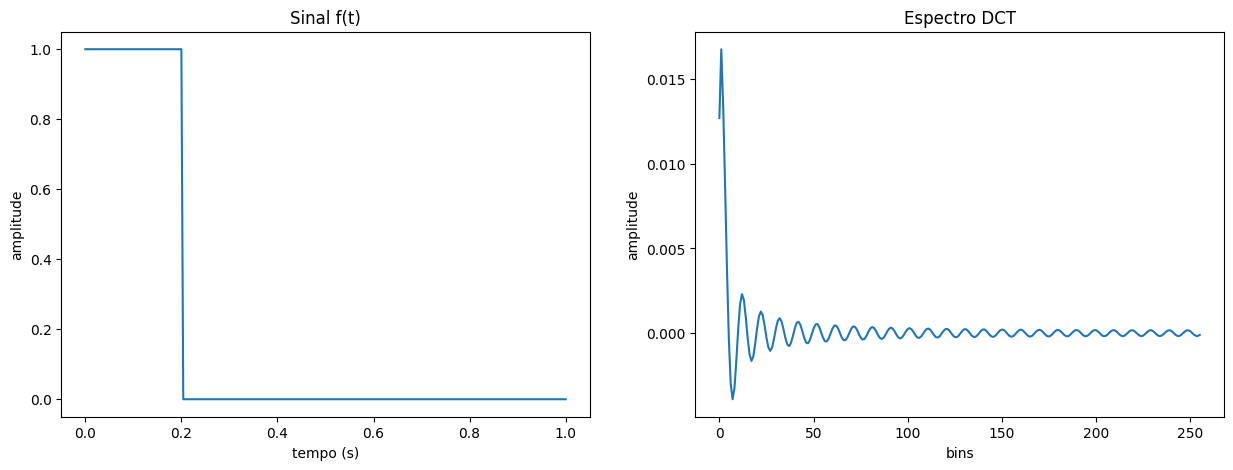

In [10]:
N = 256
t = np.linspace(0, 1, N);
f = np.zeros(N)
f[0 : int(np.floor(0.2 * N+1))] += 1
plot_func_dct(t,f)

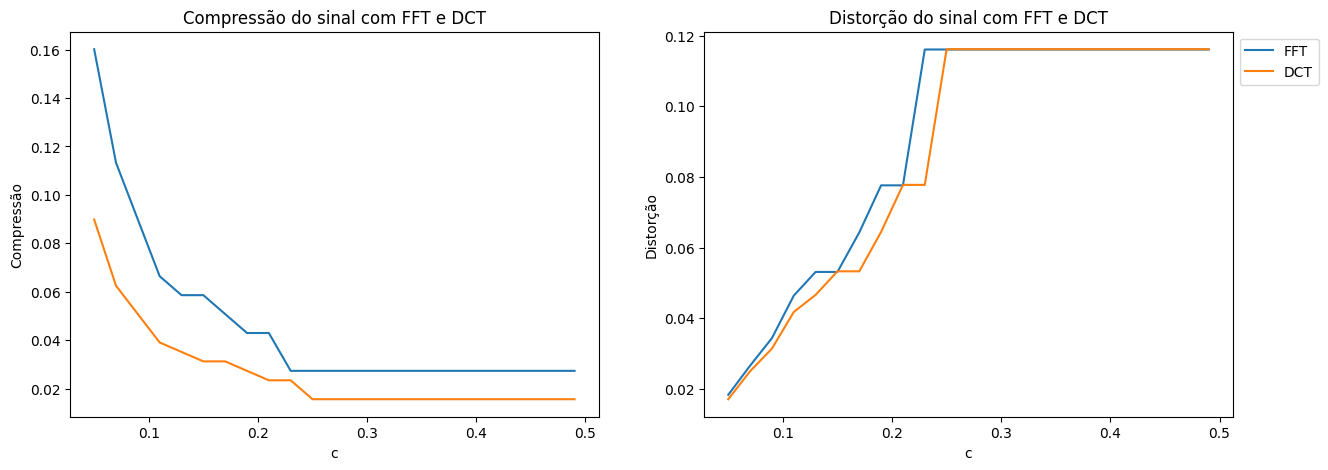

In [11]:
plot_threshold(f, c_max=0.5)

## Reconstrução da função degrau usando DCT (iterativo)

In [12]:
c = FloatLogSlider(value=-3,base=10, min=-3,max=0,basestep=0.2, continuous_update=False, layout=Layout(width='95%'))
def plt_sampled_signal(c):
    N = 256
    t = np.linspace(0, 1, N);
    f = np.zeros(N)
    f[0 : int(np.floor(0.2 * N+1))] += 1
    f_tilde, F_tilde = thresholding(f, c, method='fft')
    fc_tilde, FC_tilde = thresholding(f, c, method='dct')

    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(t, f, label='Original')
    ax[0].plot(t, f_tilde, label='Comprimido')
    ax[0].set_title('Reconstrução FFT')
    ax[0].set_ylabel('amplitude')
    ax[0].set_xlabel(f'tempo (s)\n\nCompressão(FFT): {compression(F_tilde)*100:.2f}%\nDistorção(FFT): {distortion(f,f_tilde)*100:.2f}%')
    ax[0].set_ylabel('amplitude')
    ax[1].plot(t, f, label='Original')
    ax[1].plot(t, fc_tilde, label='Comprimido')
    ax[1].set_title('Reconstrução DCT')
    ax[1].set_xlabel(f'bins\n\nCompressão(DCT): {compression(FC_tilde)*100:.2f}%\nDistorção(DCT): {distortion(f,fc_tilde)*100:.2f}%')
    ax[1].set_ylabel('amplitude')
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [13]:
# Cria o ambiente interativo
w = interactive(plt_sampled_signal, c=c,)
display(VBox([w.children[1], w.children[0]], layout=Layout(align_items='center')))
w.update()

## Exemplo 3: Função $\ f(t) = t$

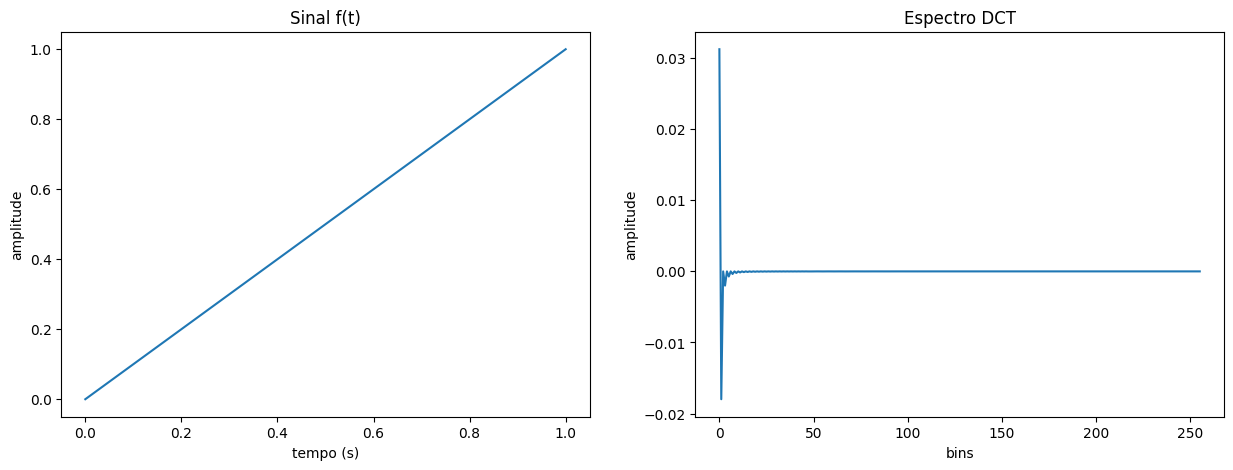

In [14]:
N=256;
t = np.linspace(0,1,N);
f = t;
plot_func_dct(t,f)

## Gráfico correspondente à Tabela 3.6 para $f(t)=t$

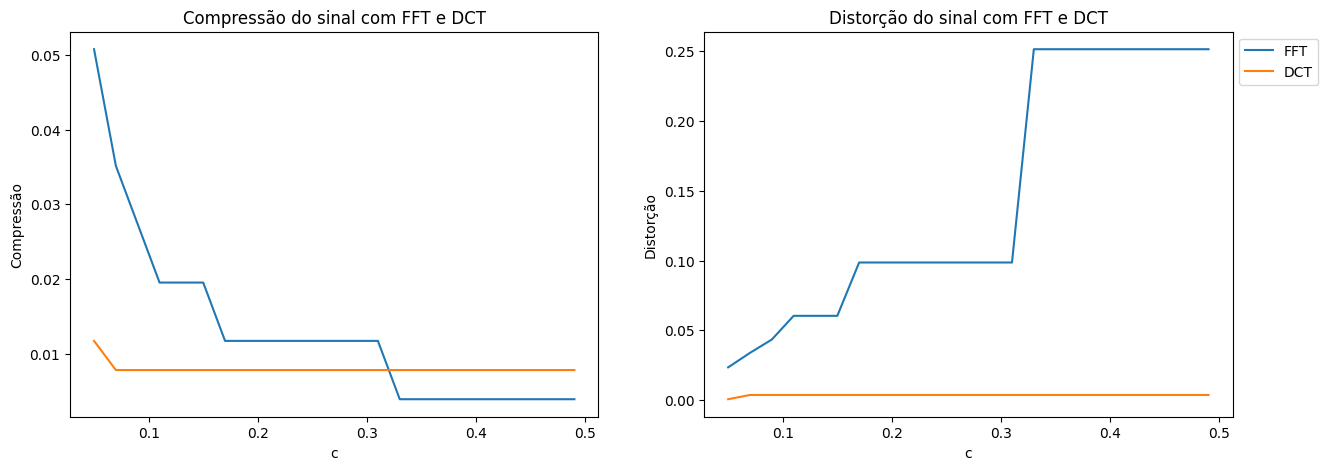

In [15]:
plot_threshold(f)

## Reconstrução da função $\ f(t)=t$ usando DCT (iterativo)

In [16]:
c = FloatLogSlider(value=-3,base=10, min=-3,max=0,basestep=0.2, continuous_update=False, layout=Layout(width='95%'))
def plt_sampled_signal(c):
    N = 256
    t = np.linspace(0, 1, N);
    f = t
    f_tilde, F_tilde = thresholding(f, c, method='fft')
    fc_tilde, FC_tilde = thresholding(f, c, method='dct')

    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(t, f, label='Original')
    ax[0].plot(t, f_tilde, label='Comprimido')
    ax[0].set_title('Reconstrução FFT')
    ax[0].set_ylabel('amplitude')
    ax[0].set_xlabel(f'tempo (s)\n\nCompressão(FFT): {compression(F_tilde)*100:.2f}%\nDistorção(FFT): {distortion(f,f_tilde)*100:.2f}%')
    ax[0].set_ylabel('amplitude')
    ax[1].plot(t, f, label='Original')
    ax[1].plot(t, fc_tilde, label='Comprimido')
    ax[1].set_title('Reconstrução DCT')
    ax[1].set_xlabel(f'bins\n\nCompressão(DCT): {compression(FC_tilde)*100:.2f}%\nDistorção(DCT): {distortion(f,fc_tilde)*100:.2f}%')
    ax[1].set_ylabel('amplitude')
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [17]:
# Cria o ambiente interativo
w = interactive(plt_sampled_signal, c=c,)
display(VBox([w.children[1], w.children[0]], layout=Layout(align_items='center')))
w.update()

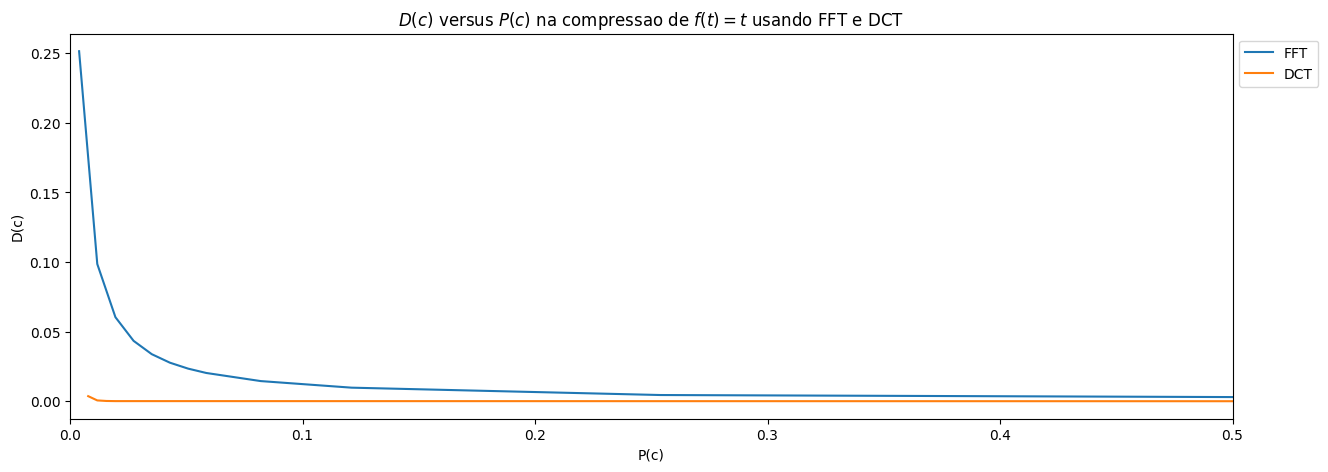

In [18]:
X = np.fft.fft(f)
C1 = np.linspace(1e-8,10 ** -0.3, 50)
P, D = comp_dist_list(f,C1,method='fft')
PC, DC = comp_dist_list(f,C1,method='dct')
plt.figure(figsize=(15,5));plt.plot(P, D, label='FFT');plt.plot(PC, DC, label='DCT')
plt.title("$D(c)$ versus $P(c)$ na compressao de $f(t)=t$ usando FFT e DCT");plt.xlabel("P(c)");plt.ylabel("D(c)");plt.xlim([0,0.5])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));plt.show()